# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

### **Импорт библиотек:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

### **Основная информация датафреймов:**

In [2]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
display(data_0.head())
print()
print(data_0.info())
print()
print(data_0.shape)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

(100000, 5)


In [3]:
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
display(data_1.head())
print()
print(data_1.info())
print()
print(data_1.shape)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

(100000, 5)


In [4]:
data_2 = pd.read_csv('/datasets/geo_data_2.csv')
display(data_2.head())
print()
print(data_2.info())
print()
print(data_2.shape)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

(100000, 5)


### **Первичное описание имеющихся данных:**

- 'id' - уникальный идентификатор скважины,
- 'f0' - признак точки (неважно, что означает, но признак значим),
- 'f1' - признак точки (неважно, что означает, но признак значим),
- 'f2' - признак точки (неважно, что означает, но признак значим),
- 'product - объём запасов в скважине (тыс. баррелей) - **целевой признак.**

### **Исследование количества пропусков данных и дубликатов в столбцах:**

In [5]:
print('Кол-во пропусков в первом датафрейме:', data_0.isna().sum())
print()
print('Кол-во пропусков во втором датафрейме:', data_1.isna().sum())
print()
print('Кол-во пропусков в третьем датафрейме:', data_2.isna().sum())

Кол-во пропусков в первом датафрейме: id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Кол-во пропусков во втором датафрейме: id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Кол-во пропусков в третьем датафрейме: id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


Пропуски данных в датафреймах отсутствуют.

In [6]:
print('Кол-во дубликатов в первом датафрейме:', data_0.duplicated().sum())
print()
print('Кол-во дубликатов во втором датафрейме:', data_1.duplicated().sum())
print()
print('Кол-во дубликатов в третьем датафрейме:', data_2.duplicated().sum())

Кол-во дубликатов в первом датафрейме: 0

Кол-во дубликатов во втором датафрейме: 0

Кол-во дубликатов в третьем датафрейме: 0


Явные дубликаты в датафреймах отсутствуют.

### **Гистограммы по столбцам датафреймов:**

**Первый датафрейм:**

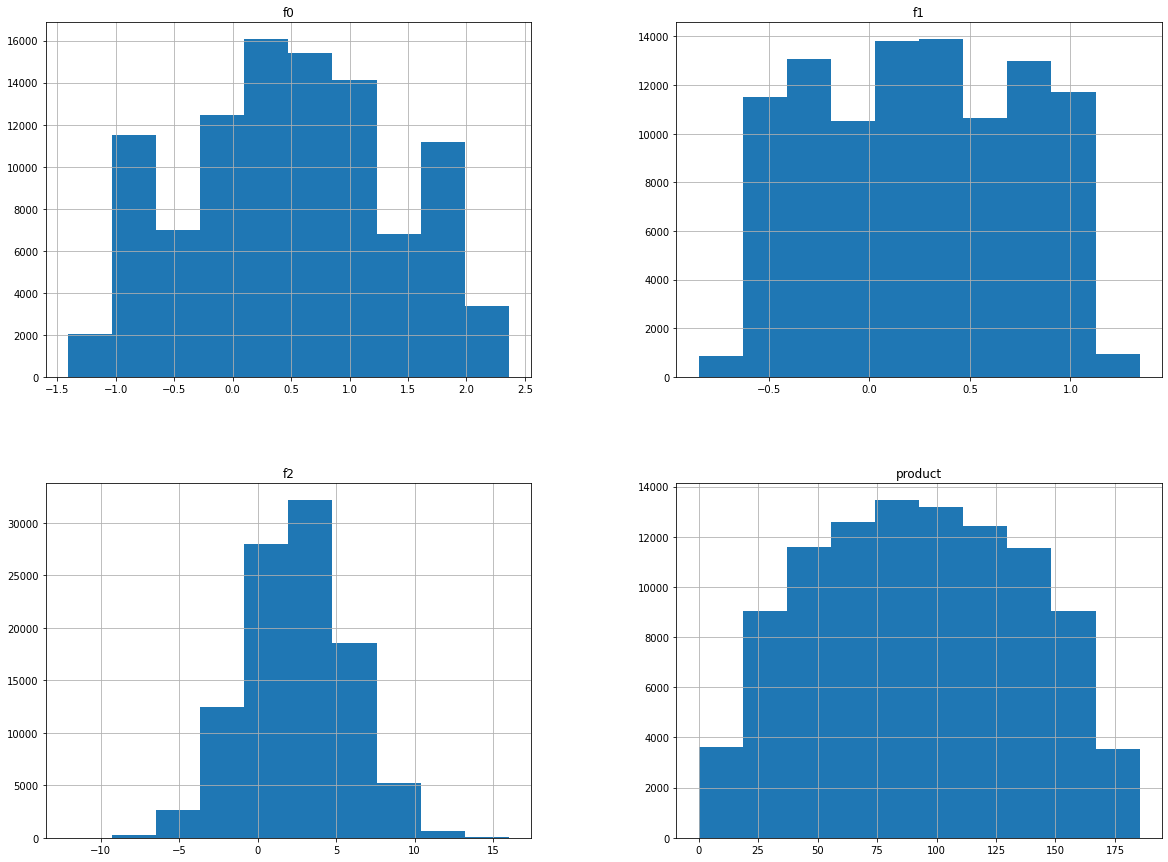

In [7]:
data_0.hist(figsize=(20, 15));

**Второй датафрейм:**

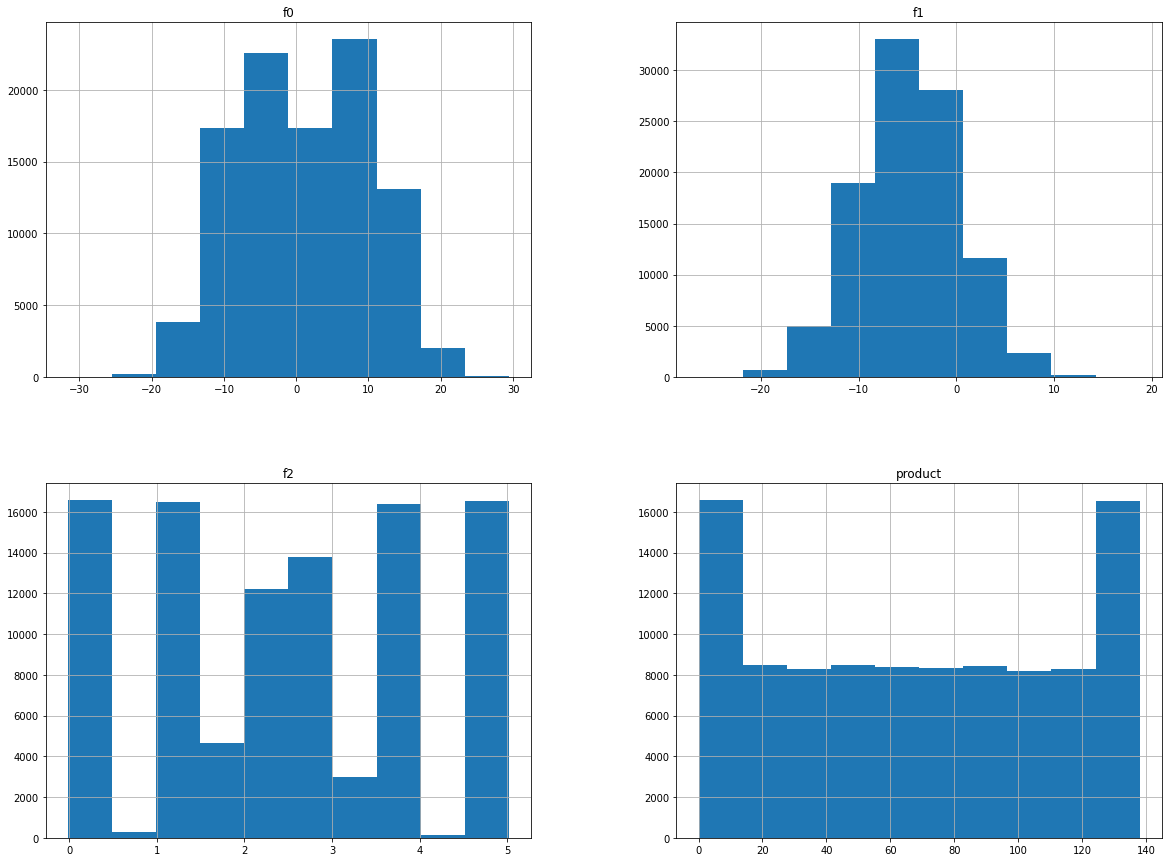

In [8]:
data_1.hist(figsize=(20, 15));

**Третий датафрейм:**

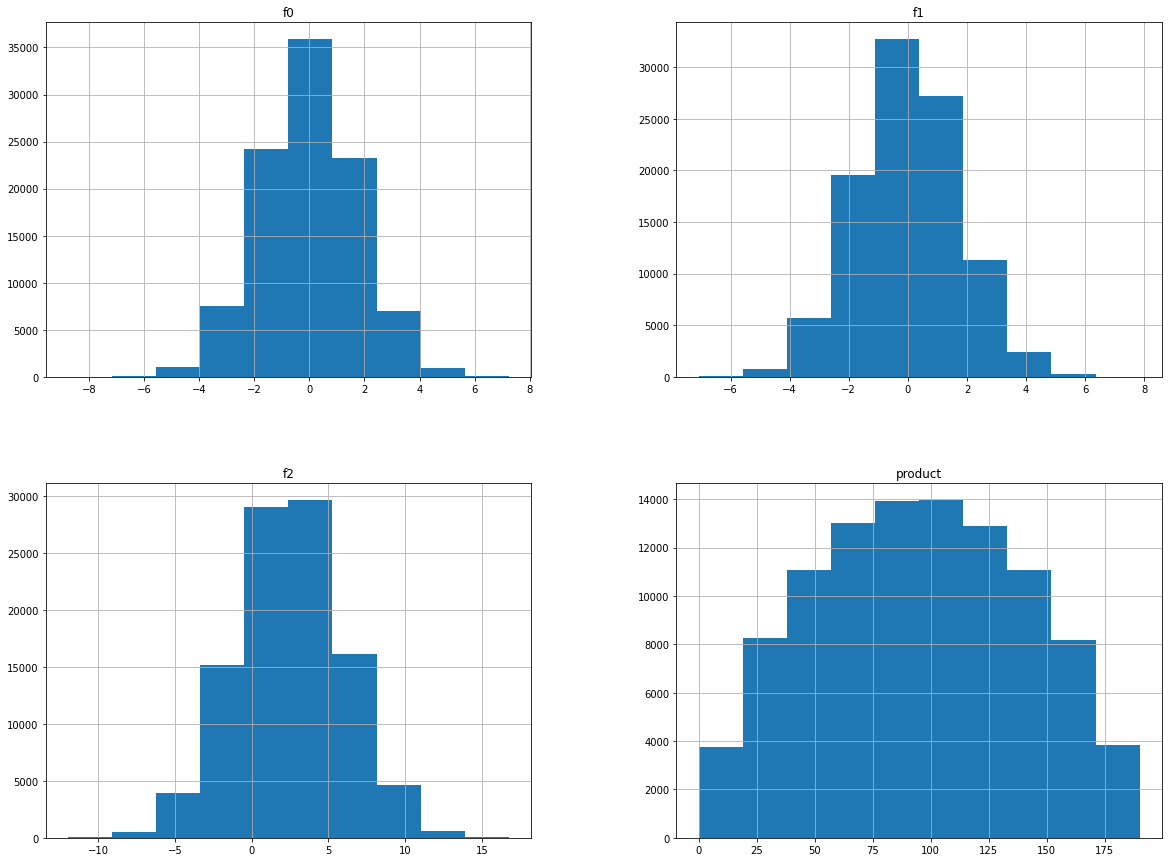

In [9]:
data_2.hist(figsize=(20, 15));

В первом и третьем датафреймах данные имеют преимущественно нормальное распределение.  
Во втором датафрейме присутствуют выбросы (аномальные значения) - так как из условий задачи неизвестно, что означают признаки ('f0', 'f1', 'f2'), сделать однозначный вывод о нормальности распределения данных и о характере выбросов не представляется возможным.

### **Исключение данных, не влияющих на целевой признак:**

Также на данном этапе целесообразно удалить столбец, который явно не будет оказывать влияния на целевой признак (но может привести к переобучению модели) - столбец 'id': 

In [10]:
data_0 = data_0.drop(['id'], axis=1)
data_1 = data_1.drop(['id'], axis=1)
data_2 = data_2.drop(['id'], axis=1)

### **Исследование кол-ва "нулевых" значений:**

In [11]:
def zero_count(data, target):
    count = data[data[target] == 0][target].count()
    percent = count / data.shape[0]
    print('Кол-во "нулевых" значений:', count)
    print('Процент "нулевых" значений:', percent)

**Первый датафрейм:**

In [12]:
zero_count(data_0, 'product')

Кол-во "нулевых" значений: 1
Процент "нулевых" значений: 1e-05


**Второй датафрейм:**

In [13]:
zero_count(data_1, 'product')

Кол-во "нулевых" значений: 8235
Процент "нулевых" значений: 0.08235


**Третий датафрейм:**

In [14]:
zero_count(data_2, 'product')

Кол-во "нулевых" значений: 1
Процент "нулевых" значений: 1e-05


Во втором датафрейме 8% данных имеет "нулевое" значения в столбце 'product' - предположительно данные были либо утеряны, либо данные о кол-ве тыс. баррелей не исследовались вовсе.  
В первом и третьем датафреймах по одному "нулевому" значению в столбце 'product'.

### **Вывод:**

**При первичном анализе датафрейма:**
- несоответствий форматов данных не обнаружено;
- явные дубликаты отсутствуют;
- пропуски данных в столбцах отсутствуют;
- "аномальные" значения отсутствуют в первом и третьем датафреймах;
- "аномальные" значения присутствуют во втором датафрейме, однако, так как из условий задачи неизвестно, что означают признаки ('f0', 'f1', 'f2'), сделать однозначный вывод о нормальности распределения данных и о характере выбросов не представляется возможным - удаление "аномальных" значений на данной стадии исследования нецелесообразно;
  
**Из датафреймов удален столбец ("id")**, не влияющий на целевой признак.  
**Установлено, что второй датафрейм** значительно отличается по своей структуре от первого и третьего, в т.ч. значительным кол-вом "нулевых" значений в столбце 'product' (целевой признак).

## Обучение и проверка модели

Для обучения модели будет использоваться линейная регрессия.

In [15]:
model = LinearRegression()

Также в обучении будут участвовать исходные данные и данные с масштабированными признаками (для сравнения).

*Функция разделения на выборки для исходных данных:*

In [16]:
def feature_valid_split(data, target):
    features = data.drop([target] , axis=1)
    target = data[target]

    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)
    
    return features_train, features_valid, target_train, target_valid

*Функция разделения на выборки для данных с масштабированными признаками:*

In [17]:
def feature_valid_split_scaled(data, numeric, target):
    data_scaled = data.copy()

    features_scaled = data_scaled.drop([target] , axis=1)
    target_scaled = data_scaled[target]

    features_train_scaled, features_valid_scaled, target_train_scaled, target_valid_scaled = train_test_split(features_scaled, target_scaled, test_size=0.25, random_state=12345)

    scaler = StandardScaler()
    scaler.fit(features_train_scaled[numeric])
    features_train_scaled[numeric] = scaler.transform(features_train_scaled[numeric])
    features_valid_scaled[numeric] = scaler.transform(features_valid_scaled[numeric])

    return features_train_scaled, features_valid_scaled, target_train_scaled, target_valid_scaled

### **Работа с исходными данными:**

**Первый датафрейм - разделение на обучающую и валидационную выборки:**

In [18]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = feature_valid_split(data_0, 'product')
print('Тренировочная:', features_train_0.shape[0])
print('Валидационная:', features_valid_0.shape[0])
display(features_train_0.head())

Тренировочная: 75000
Валидационная: 25000


,f0,f1,f2
27212,0.022450,0.951034,2.197333
7866,1.766731,0.007835,6.436602
62041,0.724514,0.666063,1.840177
70185,-1.104181,0.255268,2.026156
82230,-0.635263,0.747990,6.643327


**Первый датафрейм - обучение модели:**

In [19]:
model.fit(features_train_0, target_train_0)
predicted_target_0 = pd.Series(model.predict(features_valid_0), index=features_valid_0.index)
mse_0 = mean_squared_error(target_valid_0, predicted_target_0)**0.5
print('RMSE:', mse_0)

RMSE: 37.5794217150813


**Второй датафрейм - разделение на обучающую и валидационную выборки:**

In [20]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = feature_valid_split(data_1, 'product')
print('Тренировочная:', features_train_1.shape[0])
print('Валидационная:', features_valid_1.shape[0])
display(features_train_1.head())

Тренировочная: 75000
Валидационная: 25000


,f0,f1,f2
27212,-6.488552,-1.590478,3.001311
7866,18.819463,4.602079,2.996867
62041,10.816499,-3.919653,1.991077
70185,-12.416362,-9.343774,0.996691
82230,-15.041012,-8.474624,1.996463


**Второй датафрейм - обучение модели:**

In [21]:
model.fit(features_train_1, target_train_1)
predicted_target_1 = pd.Series(model.predict(features_valid_1), index=features_valid_1.index)
mse_1 = mean_squared_error(target_valid_1, predicted_target_1)**0.5
print('RMSE:', mse_1)

RMSE: 0.893099286775617


**Третий датафрейм - разделение на обучающую и валидационную выборки:**

In [22]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = feature_valid_split(data_2, 'product')
print('Тренировочная:', features_train_2.shape[0])
print('Валидационная:', features_valid_2.shape[0])
display(features_train_2.head())

Тренировочная: 75000
Валидационная: 25000


,f0,f1,f2
27212,-0.906828,1.339033,1.106789
7866,-1.536353,-0.704673,-1.747632
62041,-1.959584,0.356044,3.528659
70185,2.129734,2.713459,-0.156172
82230,-0.332026,1.515604,5.417583


**Третий датафрейм - обучение модели:**

In [23]:
model.fit(features_train_2, target_train_2)
predicted_target_2 = pd.Series(model.predict(features_valid_2), index=features_valid_2.index)
mse_2 = mean_squared_error(target_valid_2, predicted_target_2)**0.5
print('RMSE:', mse_2)

RMSE: 40.02970873393434


### **Работа с данными с масштабированными признаками:**

**Первый датафрейм - разделение на обучающую и валидационную выборки:**

In [24]:
features_train_0_scaled, features_valid_0_scaled, target_train_0_scaled, target_valid_0_scaled = feature_valid_split_scaled(data_0, ['f0', 'f1', 'f2'], 'product')
print('Тренировочная:', features_train_0_scaled.shape[0])
print('Валидационная:', features_valid_0_scaled.shape[0])
display(features_train_0_scaled.head())

Тренировочная: 75000
Валидационная: 25000


,f0,f1,f2
27212,-0.544828,1.390264,-0.094959
7866,1.455912,-0.480422,1.209567
62041,0.260460,0.825069,-0.204865
70185,-1.837105,0.010321,-0.147634
82230,-1.299243,0.987558,1.273181


**Первый датафрейм - обучение модели:**

In [25]:
model.fit(features_train_0_scaled, target_train_0_scaled)
predicted_target_0_scaled = pd.Series(model.predict(features_valid_0_scaled), index=features_valid_0_scaled.index)
mse_0_scaled = mean_squared_error(target_valid_0_scaled, predicted_target_0_scaled)**0.5
print('RMSE:', mse_0_scaled)

RMSE: 37.5794217150813


**Второй датафрейм - разделение на обучающую и валидационную выборки:**

In [26]:
features_train_1_scaled, features_valid_1_scaled, target_train_1_scaled, target_valid_1_scaled = feature_valid_split_scaled(data_1, ['f0', 'f1', 'f2'], 'product')
print('Тренировочная:', features_train_1_scaled.shape[0])
print('Валидационная:', features_valid_1_scaled.shape[0])
display(features_train_1_scaled.head())

Тренировочная: 75000
Валидационная: 25000


,f0,f1,f2
27212,-0.850855,0.624428,0.296943
7866,1.971935,1.832275,0.294333
62041,1.079305,0.170127,-0.296418
70185,-1.512028,-0.887837,-0.880471
82230,-1.804775,-0.718311,-0.293255


**Второй датафрейм - обучение модели:**

In [27]:
model.fit(features_train_1_scaled, target_train_1_scaled)
predicted_target_1_scaled = pd.Series(model.predict(features_valid_1_scaled), index=features_valid_1_scaled.index)
mse_1_scaled = mean_squared_error(target_valid_1_scaled, predicted_target_1_scaled)**0.5
print('RMSE:', mse_1_scaled)

RMSE: 0.893099286775617


**Третий датафрейм - разделение на обучающую и валидационную выборки:**

In [28]:
features_train_2_scaled, features_valid_2_scaled, target_train_2_scaled, target_valid_2_scaled = feature_valid_split_scaled(data_2, ['f0', 'f1', 'f2'], 'product')
print('Тренировочная:', features_train_2_scaled.shape[0])
print('Валидационная:', features_valid_2_scaled.shape[0])
display(features_train_2_scaled.head())

Тренировочная: 75000
Валидационная: 25000


,f0,f1,f2
27212,-0.526160,0.776329,-0.400793
7866,-0.889625,-0.404070,-1.222936
62041,-1.133984,0.208576,0.296765
70185,1.227045,1.570166,-0.764556
82230,-0.194289,0.878312,0.840821


**Третий датафрейм - обучение модели:**

In [29]:
model.fit(features_train_2_scaled, target_train_2_scaled)
predicted_target_2_scaled = pd.Series(model.predict(features_valid_2_scaled), index=features_valid_2_scaled.index)
mse_2_scaled = mean_squared_error(target_valid_2_scaled, predicted_target_2_scaled)**0.5
print('RMSE:', mse_2_scaled)

RMSE: 40.02970873393434


**Итоги:**

**Первый датафрейм:**  
- RMSE: 37.5794217150813 (исходные данные)
- RMSE: 37.5794217150813 (данные с масштабированными признаками)  
  
**Второй датафрейм:**
- RMSE: 0.893099286775617 (исходные данные)
- RMSE: 0.893099286775617 (данные с масштабированными признаками)  
  
**Третий датафрейм:**
- RMSE: 40.02970873393434 (исходные данные)
- RMSE: 40.02970873393434 (данные с масштабированными признаками)  

Показатель RMSE не изменился, *масшатирование признаков не оказало положительного влияния* на модель.

### **Сохранение предсказаний и правильных ответов на валидационной выборке:**

**Первый датафрейм:**  

In [30]:
df_test0 = pd.DataFrame()
df_test0["prediction"] = predicted_target_0
df_test0["product"] = target_valid_0
display(df_test0.head())
print()
display(df_test0.shape)

,prediction,product
71751,95.894952,10.038645
80493,77.572583,114.551489
2655,77.892640,132.603635
53233,90.175134,169.072125
91141,70.510088,122.325180


(25000, 2)

**Второй датафрейм:**

In [31]:
df_test1 = pd.DataFrame()
df_test1["prediction"] = predicted_target_1
df_test1["product"] = target_valid_1
display(df_test1.head())
print()
display(df_test1.shape)

,prediction,product
71751,82.663314,80.859783
80493,54.431786,53.906522
2655,29.748760,30.132364
53233,53.552133,53.906522
91141,1.243856,0.000000


(25000, 2)

**Третий датафрейм:**

In [32]:
df_test2 = pd.DataFrame()
df_test2["prediction"] = predicted_target_2
df_test2["product"] = target_valid_2
display(df_test2.head())
print()
display(df_test2.shape)

,prediction,product
71751,93.599633,61.212375
80493,75.105159,41.850118
2655,90.066809,57.776581
53233,105.162375,100.053761
91141,115.303310,109.897122


(25000, 2)

### **Расчет среднего запаса предсказанного сырья:**

**Первый датафрейм:**

In [33]:
predicted_target_0_mean = predicted_target_0.mean()
real_target_0_mean = target_valid_0.mean()
print('Первый датафрейм:', predicted_target_0_mean)
print('Средний запас предсказанного сырья:', predicted_target_0_mean)
print('Средний запас фактического сырья:', real_target_0_mean)
print('Показатель RMSE:', mse_0)

Первый датафрейм: 92.59256778438035
Средний запас предсказанного сырья: 92.59256778438035
Средний запас фактического сырья: 92.07859674082927
Показатель RMSE: 37.5794217150813


**Второй датафрейм:**

In [34]:
predicted_target_1_mean = predicted_target_1.mean()
real_target_1_mean = target_valid_1.mean()
print('Второй датафрейм:', predicted_target_1_mean)
print('Средний запас предсказанного сырья:', predicted_target_1_mean)
print('Средний запас фактического сырья:', real_target_1_mean)
print('Показатель RMSE:', mse_1)

Второй датафрейм: 68.728546895446
Средний запас предсказанного сырья: 68.728546895446
Средний запас фактического сырья: 68.72313602435997
Показатель RMSE: 0.893099286775617


**Третий датафрейм:**

In [35]:
predicted_target_2_mean = predicted_target_2.mean()
real_target_2_mean = target_valid_2.mean()
print('Третий датафрейм:', predicted_target_2_mean)
print('Средний запас предсказанного сырья:', predicted_target_2_mean)
print('Средний запас фактического сырья:', real_target_2_mean)
print('Показатель RMSE:', mse_2)

Третий датафрейм: 94.96504596800489
Средний запас предсказанного сырья: 94.96504596800489
Средний запас фактического сырья: 94.88423280885438
Показатель RMSE: 40.02970873393434


### **Вывод:**

Предсказанные запасы сырья по всем трем датафреймам практически идентичны (с разницей в десятые доли) фактическим запасам сырья.  
  
  
Самый высокий запас сырья (предсказанный и фактический) установлен в третьем датафрейме (94.9650 и 94.8842), однако, у данного датафрейма и самый высокий показатель квадратного корня из средней квадратичной ошибки (RMSE: 40.0297).  
  
  
Следующий по показателям - первый датафрейм: предсказанные и фактические запасы ниже (на 2 пункта:92.5926 и 92.0786), но и ниже показатель RMSE (RMSE: 37.5794).  
  
Второй датафрейм - минимальный по показателям предсказанных и фактических запасов (68.7285 и 68.7231), но также и минимальный по показателю RMSE (RMSE: 0.8931).

Таким образом, в первом и третьем масторождениях объемы сырья примерно одинаковые, однако, и модели имеют бóльшие погрешности.  
Во 2 масторождении средние запасы сырья значительно ниже, однако, и погрешность модели значительно ниже. Это может быть обусловлено ранее установленным обстоятельством, что второй датафрейм значительно отличается по своей структуре от первого и третьего, в т.ч. значительным кол-вом "нулевых" значений в столбце 'product'.

## Подготовка к расчёту прибыли

### **Подготовка данных для расчетов:**

**Из условий задачи известно:**  
- *При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.*  
- *Бюджет на разработку скважин в регионе — 10 млрд рублей.*  
- *При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.*  
- *После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.*

Исходя из условий задачи возможен расчет:
- за условную единицу берется: "тыс.руб" в "тыс.бар."
- за условную единицу берется: "руб." в "бар."  
  
В расчетах используем первый вариант: суммы в тыс.руб., единицы продукта в тыс.бар.

In [36]:
RESEARCH_POINT = 500
WORKING_POINT = 200
BUDGET = 10**7 #10 000 000 тыс.руб.
PROFIT_FROM_BARREL = 450 #450 тыс.руб.
RISK_INDEX = 0.025

BOOTSTRAP_SAMPLES = 1000
CONFIDENTIAL_INTERVAL = 0.95

### **Расчет минимального объема добычи для безубыточного производства:**

**Расчет минимального объема добычи на 200 месторождениях для безубыточного производства:**

In [37]:
MEAN_PROFIT_PER_POINT = BUDGET/WORKING_POINT
print('Средняя прибыль на лучшую точку:', round(MEAN_PROFIT_PER_POINT), 'тыс.руб.')

Средняя прибыль на лучшую точку: 50000 тыс.руб.


**Расчет среднего количества сырья в месторождениях, необходимого для безубыточного производства:**

In [38]:
MEAN_BARRELS_PER_POINT = MEAN_PROFIT_PER_POINT/PROFIT_FROM_BARREL
print('Средний запас сырья на лучшей точке:', round(MEAN_BARRELS_PER_POINT), 'тыс.бар.')

Средний запас сырья на лучшей точке: 111 тыс.бар.


**Расчет среднего количества сырья в месторождениях на регион:**

In [39]:
MEAN_BARRELS_PER_REGION = BUDGET/PROFIT_FROM_BARREL
print('Средний запас сырья в регионе:', round(MEAN_BARRELS_PER_REGION), 'тыс.бар.')

Средний запас сырья в регионе: 22222 тыс.бар.


**Расчет среднего запаса сырья в месторождении по каждому региону:**

In [40]:
print('Регион 1 (датафрейм 1) - Средний фактичекой запас сырья:', data_0['product'].mean())
print('Регион 2 (датафрейм 2) - Средний фактичекой запас сырья:', data_1['product'].mean())
print('Регион 3 (датафрейм 3) - Средний фактичекой запас сырья:', data_2['product'].mean())

Регион 1 (датафрейм 1) - Средний фактичекой запас сырья: 92.50000000000001
Регион 2 (датафрейм 2) - Средний фактичекой запас сырья: 68.82500000000002
Регион 3 (датафрейм 3) - Средний фактичекой запас сырья: 95.00000000000004


**Расчет кол-ва месторождений по регионам, в которых запасов фактического сырья не менее 111 тыс.бар.:**

In [41]:
print('Регион 1 (датафрейм 1) - Кол-во месторождений, в которых запасов сырья не менее 111 тыс.бар.:', data_0[data_0['product']>=111]['product'].count())
print('Регион 2 (датафрейм 2) - Кол-во месторождений, в которых запасов сырья не менее 111 тыс.бар.:', data_1[data_1['product']>=111]['product'].count())
print('Регион 3 (датафрейм 3) - Кол-во месторождений, в которых запасов сырья не менее 111 тыс.бар.:', data_2[data_2['product']>=111]['product'].count())

Регион 1 (датафрейм 1) - Кол-во месторождений, в которых запасов сырья не менее 111 тыс.бар.: 36676
Регион 2 (датафрейм 2) - Кол-во месторождений, в которых запасов сырья не менее 111 тыс.бар.: 16537
Регион 3 (датафрейм 3) - Кол-во месторождений, в которых запасов сырья не менее 111 тыс.бар.: 38278


### **Вывод:**

Проведенным анализом установлено:
- Безубыточное производство возможно, если **в месторождении сырья не менее чем на 111 тыс.бар.** (при условии выбора 200 лучших скважин из 500 в выборке)
- Безубыточное производство возможно, если **в месторождениях региона сырья не менее чем на 22222 тыс.бар.**
- **Средний запас сырья в месторождении по регионам составил:**
    - Регион 1 (датафрейм 1): 92.5 тыс.бар.
    - Регион 2 (датафрейм 2): 68.8 тыс.бар.
    - Регион 3 (датафрейм 3): 95.0 тыс.бар.
- **Кол-во месторождений по регионам, в которых запасов фактического сырья не менее 111 тыс.бар.:**
    - Регион 1 (датафрейм 1): 36676 шт.
    - Регион 2 (датафрейм 2): 16537 шт.
    - Регион 3 (датафрейм 3): 38278 шт.

Таким образом, первый и третий регионы потенциально являются более прибыльными, чем второй. При этом, все три региона являются потенциально безубыточными при выборе определенных месторождений.

## Расчёт прибыли и рисков 

### **Функция для расчета прибыли:**

In [42]:
state = np.random.RandomState(12345)

In [43]:
def income(predicted_target, target_valid, count):
    probs_sorted = target_valid.sort_values(ascending=False)
    selected = predicted_target[probs_sorted.index][:count]
    return selected.sum() * PROFIT_FROM_BARREL - BUDGET

### **Функция для расчета рисков:**

In [44]:
def bootstrap(target_valid, predicted_target, region):
    values=[]
    for i in range(1000):
        research_point = predicted_target.sample(replace=True, random_state=state, n=RESEARCH_POINT)
        working_point = target_valid[research_point.index]
        values.append(income(research_point, working_point, WORKING_POINT))
    
    values = pd.Series(values)
    print(f'Регион {region} (датафрейм {region}) - средняя прибыль:', round(values.mean()), 'тыс.руб.')   
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    print(f'95% доверительный интервал от:', round(lower), 'тыс.руб.', 'до', round(upper), 'тыс.руб.')
    risk = values[values<0].count() / values.count() * 100
    print(f'Риск убытков:', round(risk, 2), '%')

**Первый регион (первый датафрейм):**

In [45]:
bootstrap(predicted_target_0, target_valid_0, 1)

Регион 1 (датафрейм 1) - средняя прибыль: 425939 тыс.руб.
95% доверительный интервал от: -102090 тыс.руб. до 947976 тыс.руб.
Риск убытков: 6.0 %


**Второй регион (второй датафрейм):**

In [46]:
bootstrap(predicted_target_1, target_valid_1, 2)

Регион 2 (датафрейм 2) - средняя прибыль: 518259 тыс.руб.
95% доверительный интервал от: 128123 тыс.руб. до 953613 тыс.руб.
Риск убытков: 0.3 %


**Третий регион (третий датафрейм):**

In [47]:
bootstrap(predicted_target_2, target_valid_2, 3)

Регион 3 (датафрейм 3) - средняя прибыль: 420194 тыс.руб.
95% доверительный интервал от: -115853 тыс.руб. до 989630 тыс.руб.
Риск убытков: 6.2 %


### **Вывод:**

Проведен первичный анализ данных. Установлено отсутствие несоответствий форматов данных, явных дубликататов, пропусков данных.    

Из датафреймов удален столбец ("id"), который не оказывает влияния на целевой признак, но может негативно сказаться на обучении модели (привести к переобучению).  
    
Установлено, что второй датафрейм (второй регион) значительно отличается по своей структуре от первого и третьего, в т.ч. значительным кол-вом "нулевых" значений в столбце 'product' (целевой признак).

Предсказанные запасы сырья по всем трем регионам практически идентичны (с разницей в десятые доли) фактическим запасам сырья по регионам.

Расчитаны показатели RMSE для каждого региона:
- Первый регион: 37.5794
- Второй регион: 0.8931
- Третий регион: 40.0297
  
Выявлено, что безубыточное производство возможно, если в месторождении сырья не менее чем на 111 тыс.бар. (при условии выбора 200 лучших скважин из 500 в выборке).
  
Рассчитано кол-во месторождений по регионам, в которых запасов фактического сырья не менее 111 тыс.бар.:
- Регион 1 (датафрейм 1): 36676 шт.
- Регион 2 (датафрейм 2): 16537 шт.
- Регион 3 (датафрейм 3): 38278 шт.
  
Первый и третий регионы имеют схожие показатели, как по уровню потенциальной прибыли, так и по уровню рисков.  
  
По результатам проведенного анализа установлено, что второй регион показывает лучшие с точки зрения прибыли показатели:
- минимальные риски,
- более "узкий" доверительный интервал,
- окупаемость даже при выборе не самых лучших месторождений для разработки,  
  
и рекомендован к разработке.
  

